In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

2025-11-18 15:42:44.551403: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-18 15:42:44.561723: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-18 15:42:44.935765: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI AVX_VNNI_INT8 AVX_NE_CONVERT FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-18 15:42:47.415035: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computat

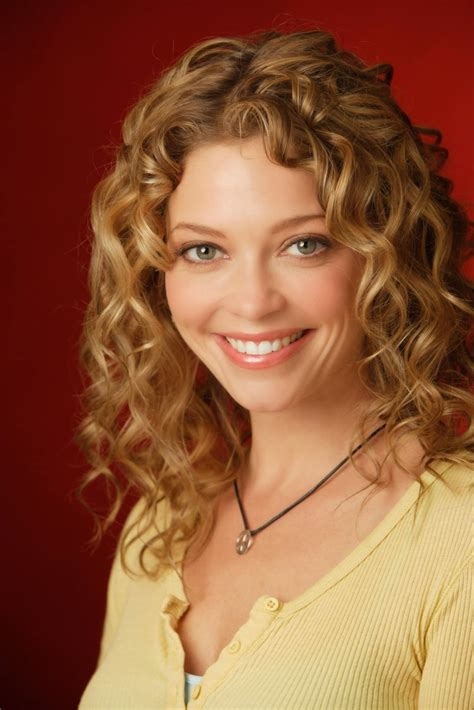

In [2]:
path = '/home/katwre/projects/machine-learning-zoomcamp/homeworks/08-deep-learning/data/train/curly/'
name =  'image28.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255)
train_ds = train_gen.flow_from_directory(
    '/home/katwre/projects/machine-learning-zoomcamp/homeworks/08-deep-learning/data/train',
    target_size=(200, 200),
    batch_size=20, #how many images at once are gonna be analyzed
    shuffle=True,
    class_mode="binary"
)

test_gen = ImageDataGenerator(rescale=1./255)
test_ds = train_gen.flow_from_directory(
    '/home/katwre/projects/machine-learning-zoomcamp/homeworks/08-deep-learning/data/test',
    target_size=(200, 200),
    batch_size=20, #how many images at once are gonna be analyzed
    shuffle=True,
    class_mode="binary"
)

Found 800 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [28]:
inputs = keras.Input(shape=(200, 200, 3))
base = keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
vectors = keras.layers.MaxPooling2D((2, 2))(base)
fl = keras.layers.Flatten()(vectors)
inner = keras.layers.Dense(64, activation='relu')(fl)
outputs = keras.layers.Dense(1, activation='sigmoid')(inner)
model = keras.Model(inputs, outputs)


optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
model.compile(optimizer, 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.7925 - loss: 0.4418 - val_accuracy: 0.6866 - val_loss: 0.5930
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.7975 - loss: 0.4478 - val_accuracy: 0.6716 - val_loss: 0.6065
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.8325 - loss: 0.3962 - val_accuracy: 0.6667 - val_loss: 0.6041
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.8375 - loss: 0.3697 - val_accuracy: 0.6866 - val_loss: 0.6121
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.8475 - loss: 0.3715 - val_accuracy: 0.6667 - val_loss: 0.6562
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.8525 - loss: 0.3530 - val_accuracy: 0.6766 - val_loss: 0.5722
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.8475 - loss: 0.3336 - val_accuracy: 0.6716 - val_loss: 0.6576
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.8687 - loss: 0.3080 - val_accuracy: 0.

In [31]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [32]:
median_acc = np.median(history.history['accuracy'])
median_acc

np.float64(0.8475000262260437)

In [33]:
std_loss = np.std(history.history['loss'])
std_loss

np.float64(0.059406604459702264)

In [36]:
train_gen = ImageDataGenerator(rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')
train_ds = train_gen.flow_from_directory(
    '/home/katwre/projects/machine-learning-zoomcamp/homeworks/08-deep-learning/data/train',
    target_size=(200, 200),
    batch_size=20, #how many images at once are gonna be analyzed
    shuffle=True,
    class_mode="binary"
)

test_gen = ImageDataGenerator(rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')
test_ds = train_gen.flow_from_directory(
    '/home/katwre/projects/machine-learning-zoomcamp/homeworks/08-deep-learning/data/test',
    target_size=(200, 200),
    batch_size=20, #how many images at once are gonna be analyzed
    shuffle=True,
    class_mode="binary"
)

Found 800 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


Let's train our model for 10 more epochs using the same code as previously.
> **Note:** make sure you don't re-create the model - we want to continue training the model
we already started training.

In [37]:
history_aug = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 232ms/step - accuracy: 0.6600 - loss: 0.6485 - val_accuracy: 0.6766 - val_loss: 0.5941
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 218ms/step - accuracy: 0.7088 - loss: 0.5725 - val_accuracy: 0.7313 - val_loss: 0.5670
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 214ms/step - accuracy: 0.7200 - loss: 0.5579 - val_accuracy: 0.6667 - val_loss: 0.6302
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 220ms/step - accuracy: 0.7100 - loss: 0.5605 - val_accuracy: 0.6418 - val_loss: 0.6264
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 213ms/step - accuracy: 0.7275 - loss: 0.5374 - val_accuracy: 0.7363 - val_loss: 0.5670
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 220ms/step - accuracy: 0.7138 - loss: 0.5663 - val_accuracy: 0.6368 - val_loss: 0.6942
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 219ms/step - accuracy: 0.7175 - loss: 0.5657 - val_accuracy: 0.7313 - val_loss: 0.5679
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 219ms/step - accuracy: 0.7337 - loss: 0.5304 - val_accuracy: 0.

In [38]:
mean_val_loss = np.mean(history_aug.history['val_loss'])
mean_val_loss

np.float64(0.6004103600978852)

In [39]:
last5 = history_aug.history['val_accuracy'][5:10]
print(last5)

avg_last5 = np.mean(last5)
print(avg_last5)

[0.6368159055709839, 0.7313432693481445, 0.6815920472145081, 0.7014925479888916, 0.6815920472145081]
0.6865671634674072
